# Vectors and Vector Spaces for Quantum Computing
## Notebook 1.1: Building Mathematical Intuition Through Code

**Learning Objectives:**
- Understand vectors as quantum state representations
- Master vector operations using NumPy 
- Visualize quantum states and their geometric meaning
- Connect linear algebra to quantum mechanics concepts
- Build intuition for complex vector spaces

In [2]:
# Import Needed Libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from IPython.display import display, HTML, Markdown
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [4]:
print("All libraries loaded successfully ✓")

All libraries loaded successfully ✓


In [5]:
# Set up plotting
plt.style.use('seaborn-v0_8')
np.set_printoptions(precision=3, suppress=True)

## Section 1: What Are Vectors in Quantum Computing?

In classical physics, vectors represent things like velocity or force - they have magnitude and direction.
In quantum computing, vectors represent **quantum states** - the fundamental information units.

Let's start with the simplest quantum system: a **qubit** (quantum bit).

In [6]:
# The two fundamental qubit states
qubit_0 = np.array([1, 0], dtype=complex)  # |0⟩ state
qubit_1 = np.array([0, 1], dtype=complex)  # |1⟩ state

print("Fundamental Qubit States:")
print(f"|0⟩ = {qubit_0}")
print(f"|1⟩ = {qubit_1}")
print()
print("These are like the 'up' and 'down' directions in quantum space")

Fundamental Qubit States:
|0⟩ = [1.+0.j 0.+0.j]
|1⟩ = [0.+0.j 1.+0.j]

These are like the 'up' and 'down' directions in quantum space


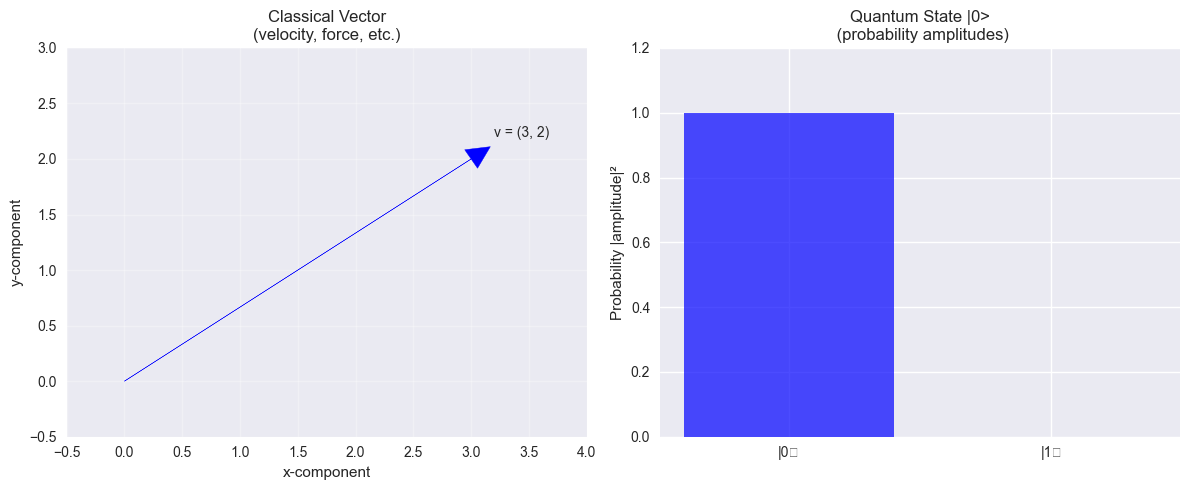

In [12]:
# Visualization: Classical vs Quantum Vectors
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Classical 2D vector
ax1.arrow(0, 0, 3, 2, head_width=0.2, head_length=0.2, fc='blue', ec='blue')
ax1.set_xlim(-0.5, 4)
ax1.set_ylim(-0.5, 3)
ax1.grid(True, alpha=0.3)
ax1.set_title('Classical Vector\n(velocity, force, etc.)')
ax1.set_xlabel('x-component')
ax1.set_ylabel('y-component')
ax1.annotate('v = (3, 2)', xy=(3, 2), xytext=(3.2, 2.2))

# Quantum state vector (abstract representation)
ax2.bar(['|0⟩', '|1⟩'], [abs(qubit_0[0])**2, abs(qubit_0[1])**2], 
        color=['blue', 'red'], alpha=0.7)
ax2.set_title('Quantum State |0>\n (probability amplitudes)')
ax2.set_ylabel('Probability |amplitude|²')
ax2.set_ylim(0, 1.2)

plt.tight_layout()
plt.show()

## Section 2: Complex Numbers in Quantum States

Unlike classical vectors, quantum state vectors have **complex number** components.
This is crucial because it allows for quantum interference - the heart of quantum computing.

In [13]:
# Create complex quantum states
plus_state = np.array([1, 1], dtype=complex) / np.sqrt(2)    # |+⟩ = (|0⟩ + |1⟩)/√2
minus_state = np.array([1, -1], dtype=complex) / np.sqrt(2)  # |-⟩ = (|0⟩ - |1⟩)/√2
complex_state = np.array([1, 1j], dtype=complex) / np.sqrt(2) # (|0⟩ + i|1⟩)/√2

print("Superposition States (Complex Amplitudes):")
print(f"|+⟩ = {plus_state}")
print(f"|-⟩ = {minus_state}")
print(f"Complex state = {complex_state}")
print()

Superposition States (Complex Amplitudes):
|+⟩ = [0.707+0.j 0.707+0.j]
|-⟩ = [ 0.707+0.j -0.707+0.j]
Complex state = [0.707+0.j    0.   +0.707j]



## Creating Complex Quantum States

The code creates three important quantum superposition states that demonstrate how complex amplitudes encode different quantum behaviors.

**The |+⟩ state** is formed by `(|0⟩ + |1⟩)/√2`, creating equal real amplitudes of `1/√2` for both basis states - this represents a qubit that has equal probability of being measured as 0 or 1, with both amplitudes "in phase" (pointing in the same direction).

**The |-⟩ state** uses `(|0⟩ - |1⟩)/√2`, which gives the same measurement probabilities but with opposite phases - the minus sign creates destructive interference that's crucial for quantum algorithms.

**The complex state** `(|0⟩ + i|1⟩)/√2` introduces an imaginary unit `i` (represented as `1j` in Python), creating a 90-degree phase difference between the two amplitudes. This phase relationship is invisible to direct measurement (both |+⟩ and the complex state give 50/50 probabilities) but fundamentally changes how the qubit behaves under quantum operations - it's this "hidden" phase information that enables quantum computers to explore solution spaces in ways classical computers cannot.

In [14]:
# Let's visualize complex amplitudes
def plot_complex_amplitudes(state, title):
    """Plot complex amplitudes as magnitude and phase"""
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))
    
    # Magnitude (what we measure)
    magnitudes = np.abs(state)**2
    ax1.bar(['|0⟩', '|1⟩'], magnitudes, color=['blue', 'red'], alpha=0.7)
    ax1.set_title('Probabilities\n|amplitude|²')
    ax1.set_ylabel('Probability')
    ax1.set_ylim(0, 1)
    
    # Real parts
    real_parts = np.real(state)
    colors = ['blue' if x >= 0 else 'red' for x in real_parts]
    ax2.bar(['Re(α₀)', 'Re(α₁)'], real_parts, color=colors, alpha=0.7)
    ax2.set_title('Real Parts')
    ax2.set_ylabel('Real Component')
    ax2.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    
    # Imaginary parts
    imag_parts = np.imag(state)
    colors = ['blue' if x >= 0 else 'red' for x in imag_parts]
    ax3.bar(['Im(α₀)', 'Im(α₁)'], imag_parts, color=colors, alpha=0.7)
    ax3.set_title('Imaginary Parts')
    ax3.set_ylabel('Imaginary Component')
    ax3.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    
    fig.suptitle(f'Complex Amplitudes: {title}', fontsize=14)
    plt.tight_layout()
    return fig

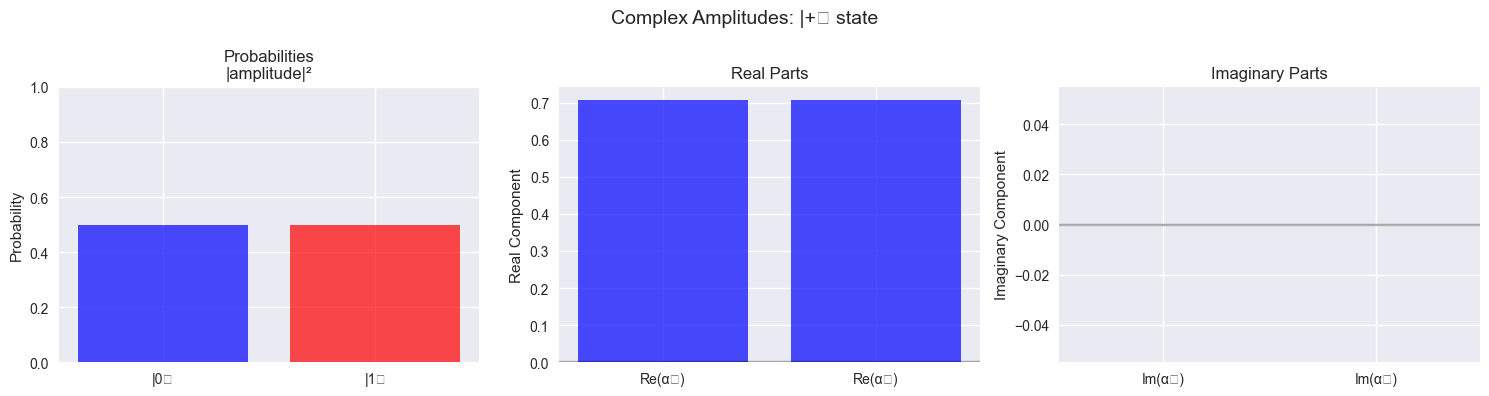

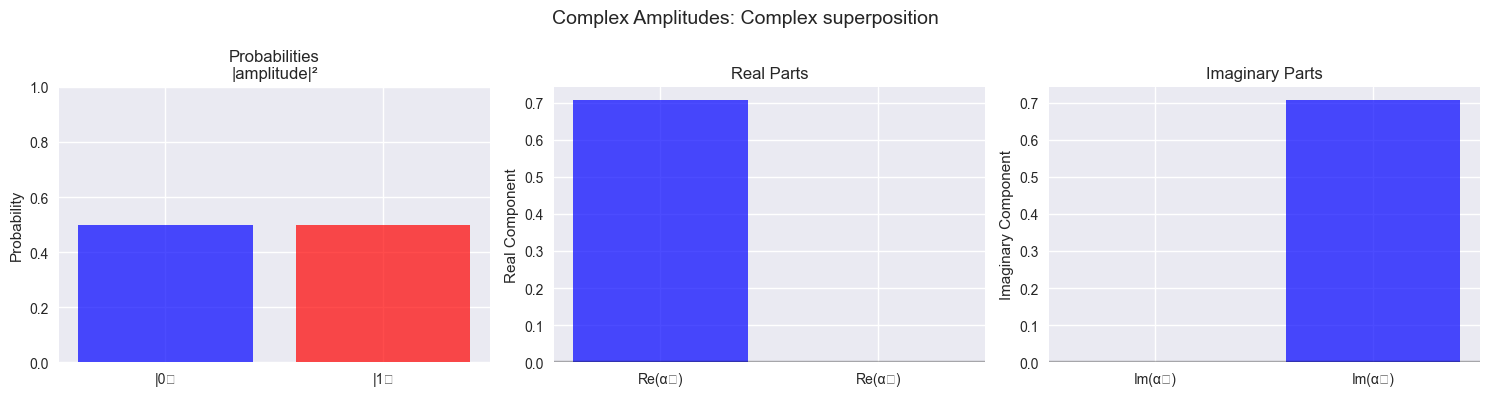

In [15]:
# Plot our complex states
plot_complex_amplitudes(plus_state, '|+⟩ state')
plt.show()

plot_complex_amplitudes(complex_state, 'Complex superposition')
plt.show()

## Understanding Complex Amplitude Visualization

The `plot_complex_amplitudes()` function provides a comprehensive view of how complex numbers encode quantum information through three complementary visualizations.

**The first plot (Probabilities)** shows what we can actually measure - the squared magnitudes |α|² of each amplitude, representing the probability of finding the qubit in each basis state when measured. This is the only information accessible through quantum measurement.

**The second plot (Real Parts)** displays the real components of the complex amplitudes, showing how much each basis state contributes "in phase" with the reference direction.

**The third plot (Imaginary Parts)** reveals the imaginary components, which encode the quantum phase relationships that enable interference effects. Together, these three views illustrate why complex numbers are essential in quantum mechanics: while we can only observe the probabilities (first plot), the quantum computation happens through the interference between the real and imaginary parts (second and third plots).

The key insight is that **two quantum states can have identical measurement probabilities but completely different computational behavior due to their phase relationships** - this is what makes quantum computing more powerful than classical probabilistic computing.

## Why Complex Quantum States Matter: The Bottom Line

**So what?** Complex quantum states are like having a secret coordinate system that classical computers can't access. Imagine you're navigating with a GPS that only shows you north-south and east-west directions, but quantum computers can also navigate using a third "phase dimension" that's completely invisible to classical measurement. **Who cares?** This hidden dimension is where quantum advantage comes from - it's why a quantum computer with just 300 qubits could theoretically outperform all classical computers combined for certain problems.

**Real-world analogy:** Think of ocean waves approaching a harbor. Two waves might have the same height (like our probability measurements), but if one wave's peak arrives exactly when the other's trough does, they cancel out completely - that's destructive interference from phase differences. Quantum computers use this same principle: they set up quantum "waves" so that wrong answers cancel out through destructive interference while correct answers amplify through constructive interference. Classical computers have to check every possible solution one by one, but quantum computers can eliminate vast numbers of wrong answers simultaneously through these phase relationships.

**The real-world impact:** This is why Google's quantum computer could solve a specific problem in 200 seconds that would take classical supercomputers 10,000 years. It's not just faster computation - it's accessing a fundamentally different computational space that exists in the complex plane, where quantum algorithms can "steer" toward correct answers using interference patterns that are impossible to replicate classically.